In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\niraj\OneDrive\Desktop\DA projects\Wine Quality prediction using ML types\QualityPrediction.csv")

In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Our target variable is Quality which gives quality 1 - 10. 1 is worst and 10 is the best wine. Other parameters are our independent variables which will helps us to predict for further analysis

In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.shape

(1599, 12)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


Total 1599 rows and 12 columns

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null Values

In [7]:
df.duplicated().sum()

240

There are 240 duplicates which can make an impact on our target variable hence we need to drop them.

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.shape

(1359, 12)

In [10]:
df.duplicated().sum() # duplicates are now removed

0

<AxesSubplot:xlabel='quality', ylabel='count'>

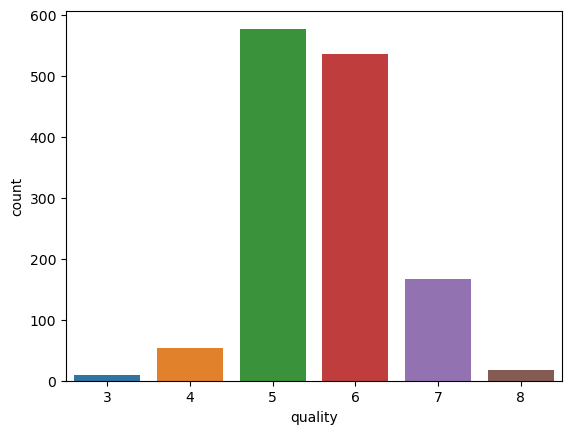

In [11]:
sns.countplot(data = df,x = "quality")

<AxesSubplot:>

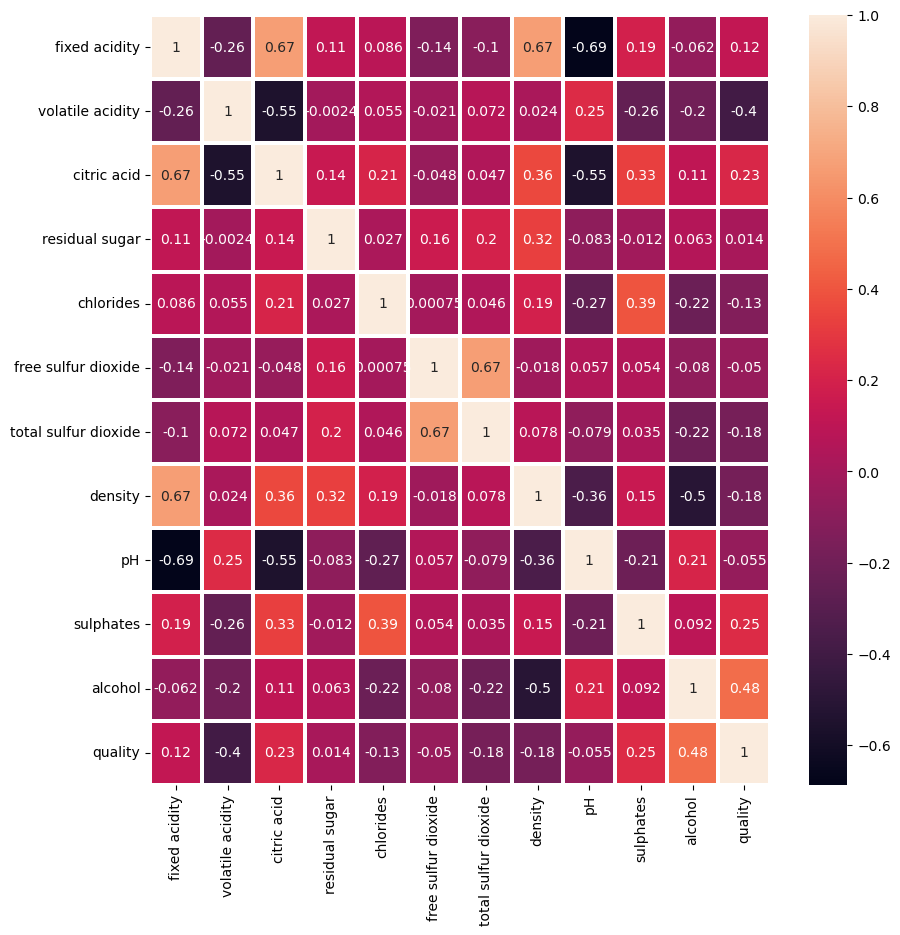

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,linewidths=1.5)

We see alcohol and volatile acidity has highest correlation with quality

Text(0, 0.5, 'Alcohol')

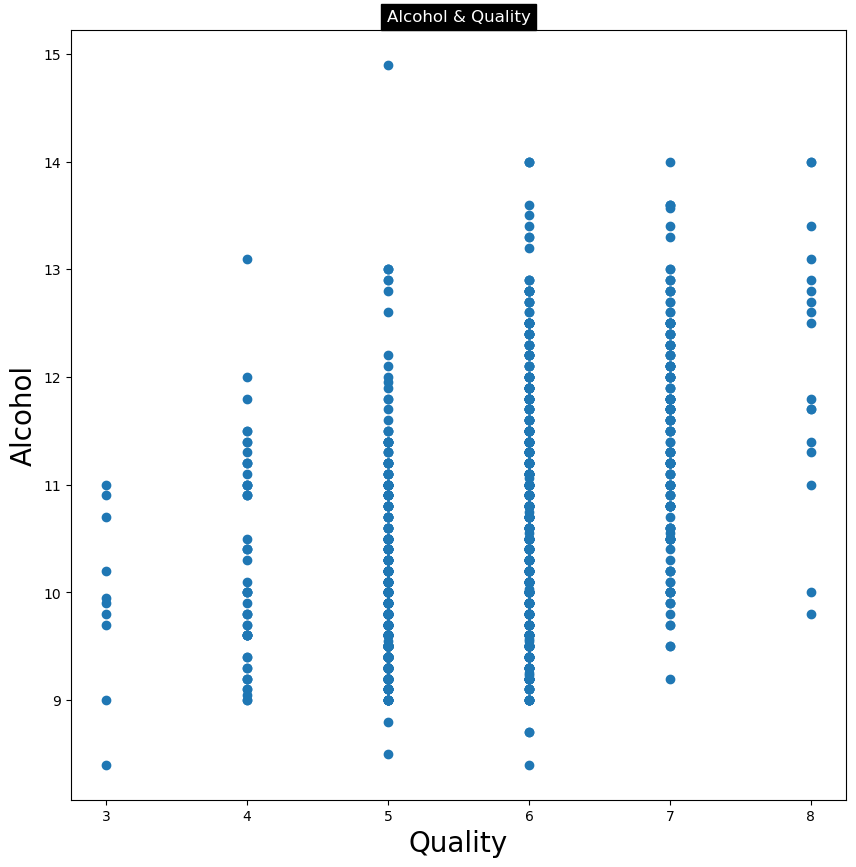

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(data = df,x = "quality",y = "alcohol")
plt.title('Alcohol & Quality' , backgroundcolor='black' , color='white' , fontsize=12)
plt.xlabel('Quality' , fontsize =20)
plt.ylabel('Alcohol' , fontsize =20)

Text(0, 0.5, 'Volatile acidity')

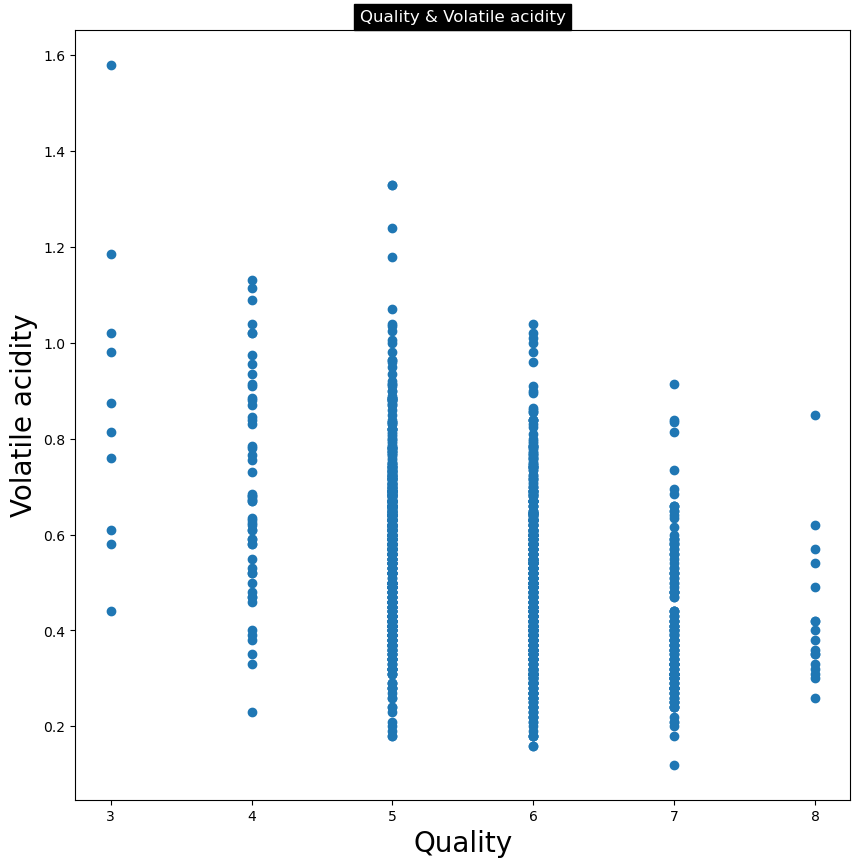

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(data = df,x = "quality",y = "volatile acidity")
plt.title('Quality & Volatile acidity' , backgroundcolor='black' , color='white' , fontsize=12)
plt.xlabel('Quality' , fontsize =20)
plt.ylabel('Volatile acidity' , fontsize =20)

Machine learning model : Random Forest(DT)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss = StandardScaler()

In [16]:
X = df.drop(["quality"],axis = 1)
y = df["quality"]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 11)

In [18]:
#X_train = ss.fit_transform(X_train)
#X_test = ss.fit_transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()

In [20]:
param_grid = { 
    'n_estimators': [100, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [21]:
cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
cv_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 500]})

In [22]:
cv_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [23]:
rfc1 = RandomForestClassifier(criterion='gini',max_depth=8,max_features='auto',n_estimators=500,random_state = 23)

In [24]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=500, random_state=23)

In [25]:
pred=rfc1.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.6441176470588236


In [27]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred))


[[  0   0   2   0   0   0]
 [  0   0   6   4   0   0]
 [  0   0 117  31   0   0]
 [  0   0  30  89  17   0]
 [  0   0   2  27  13   0]
 [  0   0   0   1   1   0]]


In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.75      0.79      0.77       148
           6       0.59      0.65      0.62       136
           7       0.42      0.31      0.36        42
           8       0.00      0.00      0.00         2

    accuracy                           0.64       340
   macro avg       0.29      0.29      0.29       340
weighted avg       0.61      0.64      0.63       340



Overall accuracy is around 64% for non scaled data for 340 samples

Machine learning model : Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_reg = LogisticRegression()

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 27)


In [32]:
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [33]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [34]:
pred = log_reg.predict(X_test)

In [35]:
print(list(y_test))

[5, 5, 5, 6, 6, 7, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 3, 5, 5, 6, 7, 5, 4, 5, 6, 6, 6, 5, 6, 5, 5, 5, 3, 5, 5, 5, 6, 5, 5, 7, 5, 7, 5, 7, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 8, 7, 6, 5, 5, 5, 6, 5, 5, 5, 6, 7, 6, 6, 5, 5, 5, 4, 6, 5, 6, 6, 6, 5, 5, 6, 4, 4, 5, 5, 5, 5, 6, 5, 6, 5, 6, 7, 7, 5, 5, 6, 5, 7, 7, 6, 7, 6, 6, 6, 6, 5, 5, 8, 5, 6, 5, 5, 6, 4, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 7, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 5, 5, 5, 5, 6, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 7, 5, 7, 5, 5, 4, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5, 7, 5, 5, 5, 6, 6, 6, 6, 8, 4, 7, 4, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 7, 5, 6, 5, 5, 5, 7, 6, 5, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 7, 5, 6, 7, 6, 5, 5, 4, 6, 6, 6, 5, 6, 5, 5, 5, 6, 4, 6, 5, 5, 5, 8, 7, 5, 6, 7, 5, 5, 5, 5, 6, 4, 6, 5, 6, 5, 7, 6, 4, 7, 4, 7, 5, 5, 7, 5, 6, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 4, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 4, 5, 5, 5, 5, 5, 

In [36]:
print(list(pred))

[5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 3, 6, 4, 6, 7, 5, 5, 6, 6, 6, 5, 7, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 7, 6, 7, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 7, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 7, 5, 6, 6, 5, 5, 5, 6, 4, 5, 5, 6, 7, 6, 5, 5, 5, 5, 7, 7, 5, 6, 7, 6, 5, 6, 6, 5, 7, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 7, 6, 5, 6, 6, 5, 6, 6, 5, 7, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 7, 5, 7, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 7, 6, 6, 5, 5, 7, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 7, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 7, 5, 6, 7, 6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 7, 5, 6, 7, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 7, 5, 6, 6, 6, 7, 5, 7, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 7, 5, 5, 5, 5, 4, 6, 5, 6, 

In [37]:
print("Accuracy for Logistic regression ",accuracy_score(y_test,pred))

Accuracy for Logistic regression  0.6205882352941177


In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00        15
           5       0.72      0.67      0.69       163
           6       0.54      0.70      0.61       122
           7       0.59      0.47      0.52        34
           8       0.00      0.00      0.00         4

    accuracy                           0.62       340
   macro avg       0.48      0.39      0.42       340
weighted avg       0.60      0.62      0.61       340



Overall accuracy is around 62% for scaled data for 340 samples

Machine Learning using KNN

In [69]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,stratify = y,random_state = 69)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
test_scores = []
train_scores = []

for i in range(1,50):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))  

In [72]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [73]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 52.352941176470594 % and k = [24]


At k = 24 we get accuracy as 52%

Text(0, 0.5, 'Accuracy Score')

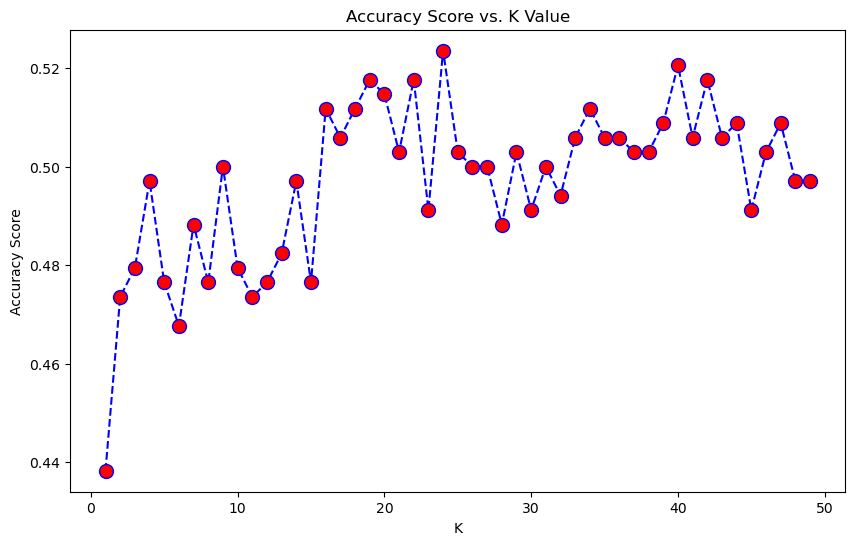

In [75]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),test_scores,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("With K = 24")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

With K = 24
[[ 0  0  0  3  0  0]
 [ 0  0  9  4  0  0]
 [ 0  0 97 45  2  0]
 [ 0  0 57 76  1  0]
 [ 0  0 10 27  5  0]
 [ 0  0  1  3  0  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.56      0.67      0.61       144
           6       0.48      0.57      0.52       134
           7       0.62      0.12      0.20        42
           8       0.00      0.00      0.00         4

    accuracy                           0.52       340
   macro avg       0.28      0.23      0.22       340
weighted avg       0.50      0.52      0.49       340



Overall accuracy is around 52% for non scaled data for 340 samples

Machine Learning : Using SVM

In [94]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.28,stratify = y,random_state = 88)
from sklearn.svm import SVC

In [95]:
svc = SVC()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
svc.fit(x_train,y_train)

SVC()

In [96]:
pred = svc.predict(x_test)

In [97]:
print(accuracy_score(y_test,pred))

0.6430446194225722


In [98]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  0   0   3   0   0   0]
 [  0   0  10   5   0   0]
 [  0   0 117  44   0   0]
 [  0   0  36 113   1   0]
 [  0   0   1  31  15   0]
 [  0   0   0   3   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.70      0.73      0.71       161
           6       0.58      0.75      0.65       150
           7       0.83      0.32      0.46        47
           8       0.00      0.00      0.00         5

    accuracy                           0.64       381
   macro avg       0.35      0.30      0.30       381
weighted avg       0.63      0.64      0.62       381



Oveerall accuracy of 64% lets check if we get better accuracy using other kernel such as linear and poly

In [102]:

svc = SVC(kernel = 'linear')
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test,pred))

0.5984251968503937


In [103]:
svc = SVC(kernel = 'poly')
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test,pred))

0.5984251968503937


No change , Lets also check with differen C parameter and Gamma parameter

In [110]:
from sklearn.model_selection import cross_val_score
C_range = list(range(11,15))
acc_score = []

for c in C_range:
    svc = SVC(kernel = "linear",C = c)
    scores = cross_val_score(svc,X,y,cv=10,scoring = "accuracy")
    acc_score.append(scores.mean())
print(acc_score)

[0.5709912854030501, 0.5717320261437908, 0.5702614379084967, 0.5680501089324619]
